In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from tradingPerformance2 import displayPerformance

In [3]:
from tradingSimulator import simulation
from TDQN import TDQN, testing

In [4]:
stocks = {
    'Dow Jones' : 'DIA',
    'S&P 500' : 'SPY',
    'NASDAQ 100' : 'QQQ',
    'FTSE 100' : 'EZU',
    'Nikkei 225' : 'EWJ',
    'Google' : 'GOOGL',
    'Apple' : 'AAPL',
    'Meta' : 'META',
    'Amazon' : 'AMZN',
    'Microsoft' : 'MSFT',
    'Nokia' : 'NOK',
    'Philips' : 'PHIA.AS',
    'Siemens' : 'SIE.DE',
    'Baidu' : 'BIDU',
    'Alibaba' : 'BABA',
    'Tencent' : '0700.HK',
    'Sony' : '6758.T',
    'JPMorgan Chase' : 'JPM',
    'HSBC' : 'HSBC',
    'CCB' : '0939.HK',
    'ExxonMobil' : 'XOM',
    'Shell' : 'SHEL',
    'PetroChina' : '0857.HK',
    'Tesla' : 'TSLA',
    'Volkswagen' : 'VOW3.DE',
    'Toyota' : '7203.T',
    'Coca Cola' : 'KO',
    'AB InBev' : 'ABI.BR',
    'Kirin' : '2503.T',
    # 'Twitter' : 'TWTR' # No accessible now
}

In [5]:
def render(data):
    fig = plt.figure(figsize=(15, 11))
    ax1 = fig.add_subplot(211, ylabel='Price', xlabel='Date')
    ax2 = fig.add_subplot(212, ylabel='Capital', xlabel='Date')
    
    data['Close'].plot(ax=ax1, color='blue', lw=2.)
    ax1.plot(data[data['Action'] == 1].index, data['Close'][data['Action'] == 1], '^', markersize=5, color='g')
    ax1.plot(data[data['Action'] == -1].index, data['Close'][data['Action'] == -1], 'v', markersize=5, color='r')
    
    data['Money'].plot(ax=ax2, color='blue', lw=2.)
    ax2.plot(data[data['Action'] == 1].index, data['Money'][data['Action'] == 1], '^', markersize=5, color='g')
    ax2.plot(data[data['Action'] == -1].index, data['Money'][data['Action'] == -1], 'v', markersize=5, color='r')
    
    ax1.legend(['Price', 'Long', 'Short'], loc='best')
    ax2.legend(['Capital', 'Long', 'Short'], loc='best')

In [6]:
stockName, startingDate, splittingDate, endingDate = 'Apple', '2012-01-01', '2018-01-01', '2020-01-01'
stockName = stocks[stockName]

dataTraining = pd.read_csv('data/'+stockName+'_'+startingDate+'_'+splittingDate+'.csv').set_index('Date')
dataTesting = pd.read_csv('data/'+stockName+'_'+splittingDate+'_'+endingDate+'.csv').set_index('Date')

In [7]:
# TrainingData, QValues0, QValues1 = simulation(stockName, startingDate, splittingDate, splittingDate, displayTraining=True)
# TrainingData.index = pd.to_datetime(TrainingData.index)

In [8]:
TrainingData, MainNetwork = TDQN(stockName, startingDate, splittingDate)

Training progression (hardware selected => cpu):


100%|██████████| 50/50 [09:58<00:00, 11.96s/it]


In [9]:
Training_Data, _, _ = testing(TrainingData, dataTraining, MainNetwork)
Training_Data.index = pd.to_datetime(TrainingData.index)

╒═══════════════════════════╤══════════╕
│   Performance Indicator   │   TDQN   │
╞═══════════════════════════╪══════════╡
│    Profit & Loss (P&L)    │  240203  │
├───────────────────────────┼──────────┤
│     Annualized Return     │  17.80%  │
├───────────────────────────┼──────────┤
│   Annualized Volatility   │  39.09%  │
├───────────────────────────┼──────────┤
│       Sharpe Ratio        │  0.713   │
├───────────────────────────┼──────────┤
│       Sortino Ratio       │  1.285   │
├───────────────────────────┼──────────┤
│     Maximum Drawdown      │  18.00%  │
├───────────────────────────┼──────────┤
│ Maximum Drawdown Duration │ 128 days │
├───────────────────────────┼──────────┤
│       Profitability       │  44.41%  │
├───────────────────────────┼──────────┤
│ Ratio Average Profit/Loss │  1.479   │
├───────────────────────────┼──────────┤
│         Skewness          │  1.994   │
╘═══════════════════════════╧══════════╛


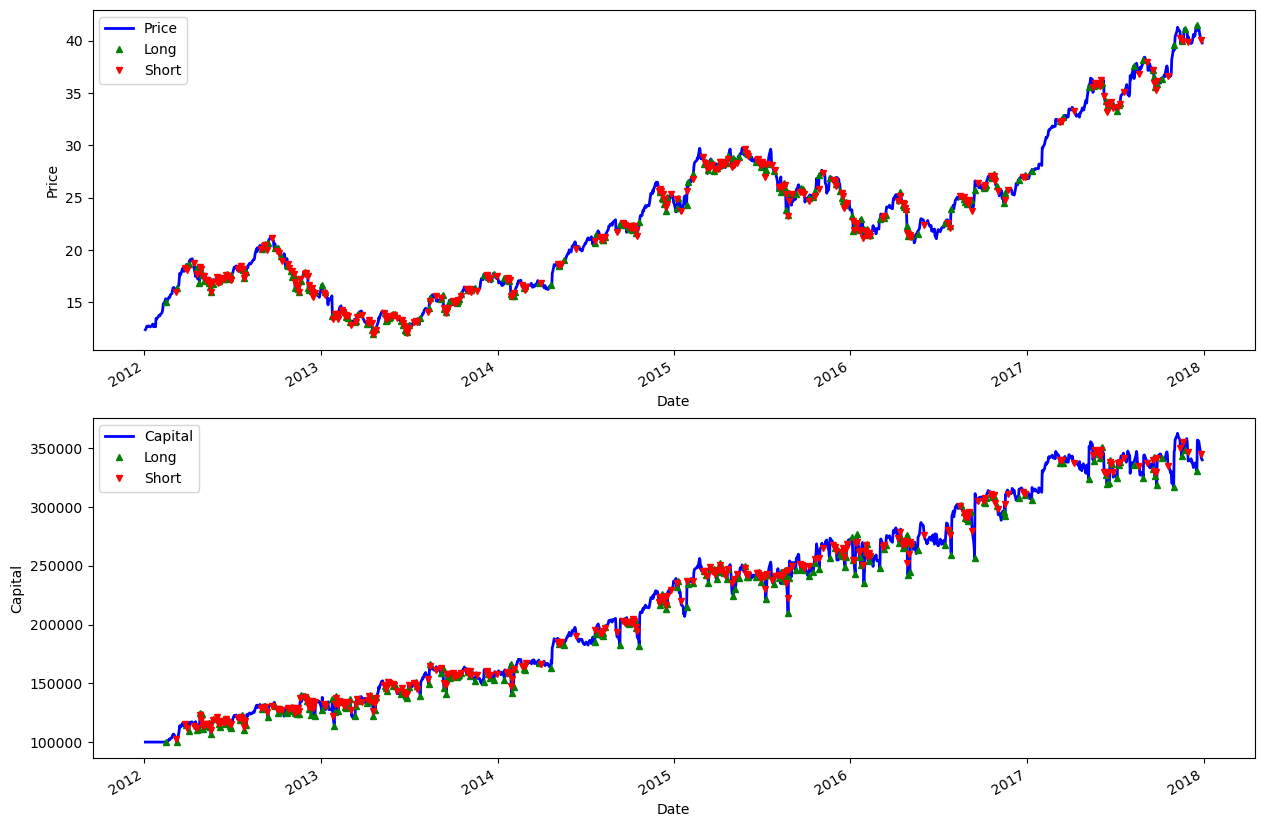

In [10]:
render(Training_Data)
displayPerformance(Training_Data, 'TDQN')

In [11]:
TestingData, _, _ = testing(dataTraining, dataTesting, MainNetwork)
TestingData.index = pd.to_datetime(TestingData.index)

╒═══════════════════════════╤════════╕
│   Performance Indicator   │  TDQN  │
╞═══════════════════════════╪════════╡
│    Profit & Loss (P&L)    │ 45306  │
├───────────────────────────┼────────┤
│     Annualized Return     │ 23.10% │
├───────────────────────────┼────────┤
│   Annualized Volatility   │ 38.03% │
├───────────────────────────┼────────┤
│       Sharpe Ratio        │ 0.677  │
├───────────────────────────┼────────┤
│       Sortino Ratio       │ 1.323  │
├───────────────────────────┼────────┤
│     Maximum Drawdown      │ 17.53% │
├───────────────────────────┼────────┤
│ Maximum Drawdown Duration │ 9 days │
├───────────────────────────┼────────┤
│       Profitability       │ 42.95% │
├───────────────────────────┼────────┤
│ Ratio Average Profit/Loss │ 1.620  │
├───────────────────────────┼────────┤
│         Skewness          │ 1.973  │
╘═══════════════════════════╧════════╛


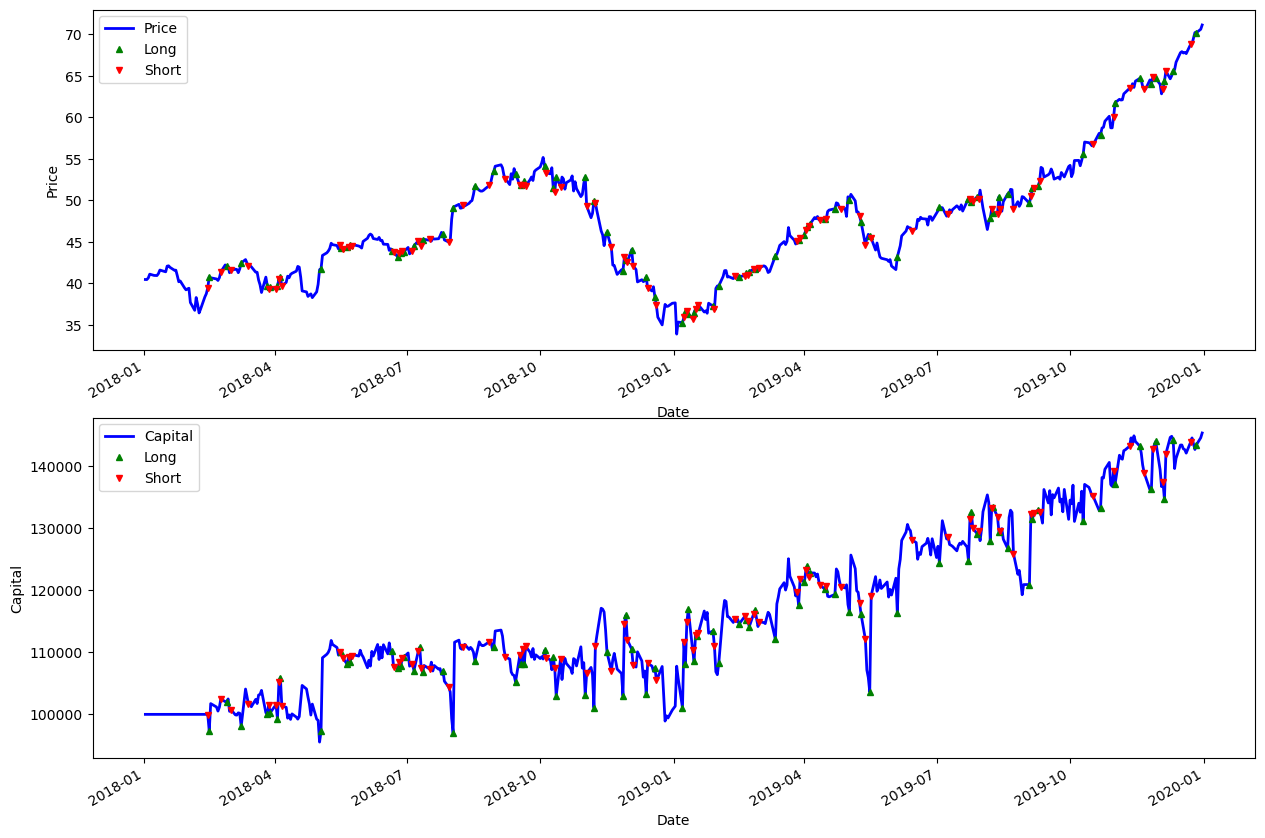

In [12]:
render(TestingData)
displayPerformance(TestingData, 'TDQN')

In [13]:
def plotEntireTrading(trainingEnv, testingEnv):
    """
    GOAL: Plot the entire trading activity, with both the training
            and testing phases rendered on the same graph for
            comparison purposes.
    
    INPUTS: - trainingEnv: Trading environment for training.
            - testingEnv: Trading environment for testing.
    
    OUTPUTS: /
    """

    # Artificial trick to assert the continuity of the Money curve
    ratio = trainingEnv['Money'][-1]/testingEnv['Money'][0]
    testingEnv['Money'] = ratio * testingEnv['Money']

    # Concatenation of the training and testing trading dataframes
    dataframes = [trainingEnv, testingEnv]
    data = pd.concat(dataframes)

    # Set the Matplotlib figure and subplots
    fig = plt.figure(figsize=(15, 10))
    ax1 = fig.add_subplot(211, ylabel='Price', xlabel='Time')
    ax2 = fig.add_subplot(212, ylabel='Capital', xlabel='Time', sharex=ax1)

    # Plot the first graph -> Evolution of the stock market price
    trainingEnv['Close'].plot(ax=ax1, color='blue', lw=2)
    testingEnv['Close'].plot(ax=ax1, color='blue', lw=2, label='_nolegend_') 
    ax1.plot(data.loc[data['Action'] == 1.0].index, 
                data['Close'][data['Action'] == 1.0],
                '^', markersize=5, color='green')   
    ax1.plot(data.loc[data['Action'] == -1.0].index, 
                data['Close'][data['Action'] == -1.0],
                'v', markersize=5, color='red')
    
    # Plot the second graph -> Evolution of the trading capital
    trainingEnv['Money'].plot(ax=ax2, color='blue', lw=2)
    testingEnv['Money'].plot(ax=ax2, color='blue', lw=2, label='_nolegend_') 
    ax2.plot(data.loc[data['Action'] == 1.0].index, 
                data['Money'][data['Action'] == 1.0],
                '^', markersize=5, color='green')   
    ax2.plot(data.loc[data['Action'] == -1.0].index, 
                data['Money'][data['Action'] == -1.0],
                'v', markersize=5, color='red')

    # Plot the vertical line seperating the training and testing datasets
    ax1.axvline(pd.Timestamp(splittingDate), color='black', linewidth=2.0)
    ax2.axvline(pd.Timestamp(splittingDate), color='black', linewidth=2.0)
    
    # Generation of the two legends and plotting
    ax1.legend(["Price", "Long",  "Short", "Train/Test separation"])
    ax2.legend(["Capital", "Long", "Short", "Train/Test separation"])
    # plt.savefig(''.join(['Figures/', str(trainingEnv.marketSymbol), '_TrainingTestingRendering', '.png'])) 
    plt.show()

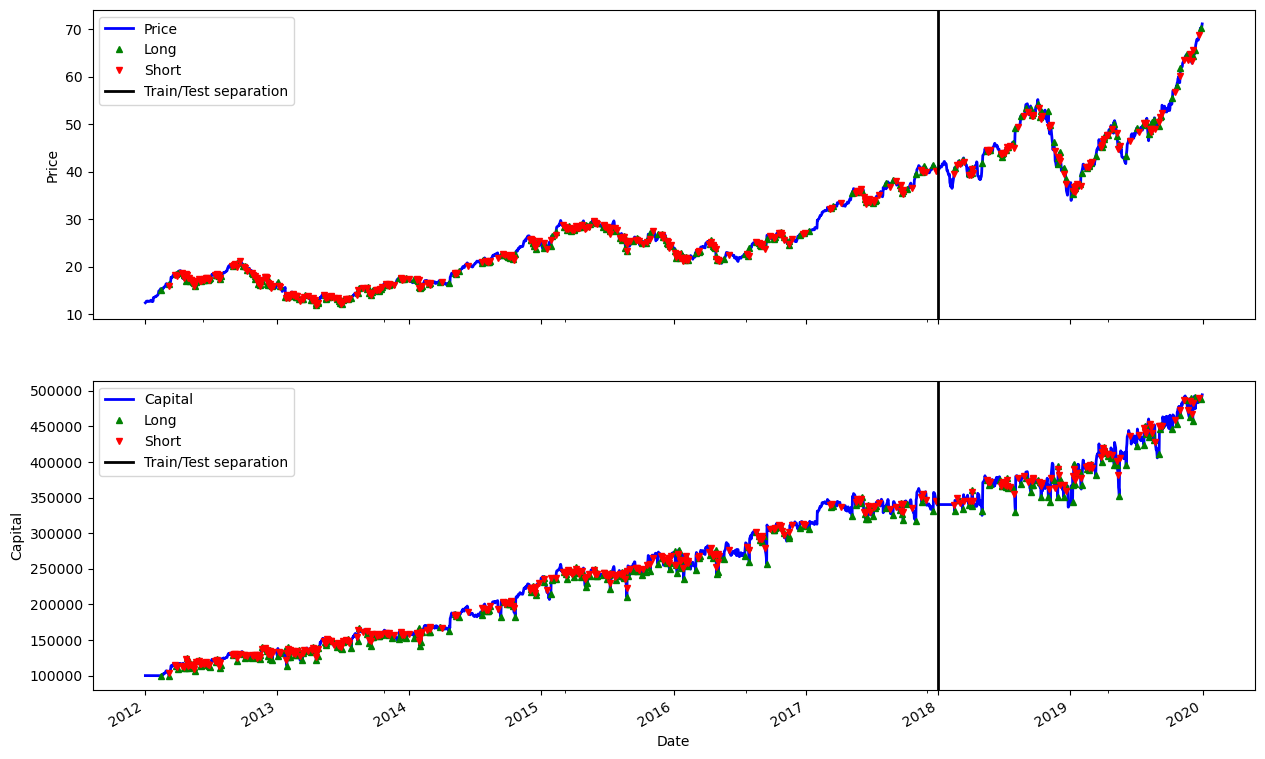

In [15]:
plotEntireTrading(Training_Data, TestingData)